# Exploratory Data Analysis (EDA) & Preprocessing: Give Me Some Credit Dataset

**Objective:**  
This notebook is dedicated to performing a comprehensive exploratory data analysis (EDA) and preprocessing on the **Give Me Some Credit** dataset. This dataset is aimed at predicting credit default risk, containing various financial and credit-related features.


## 1. Importing Necessary Libraries

In this section, we import all the required libraries to perform data loading, exploration, visualization, and preprocessing.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Setting visualization style
sns.set(style="whitegrid")

## 2. Loading the Datasets

In this section, we load the **Give Me Some Credit** training and testing datasets into separate Pandas DataFrames. We will primarily perform our exploratory analysis and preprocessing on the training set, while keeping the testing set for later model evaluation.


In [5]:
# Define the file paths for the training and testing datasets
train_file = "../data/raw/GiveMeSomeCredit-training.csv"
test_file = "../data/raw/GiveMeSomeCredit-testing.csv"

# Load the datasets into separate DataFrames
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)


In [6]:
print("Training Data Shape:", df_train.shape)
print("First 5 rows of Training Data:\n")
df_train.head()

Training Data Shape: (150000, 12)
First 5 rows of Training Data:



,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
print("\nTesting Data Shape:", df_test.shape)
print("First 5 rows of Testing Data:\n")
df_test.head()


Testing Data Shape: (101503, 12)
First 5 rows of Testing Data:



,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


## 3. Initial Data Exploration

In this step, we perform an initial exploratory data analysis (EDA) on the training dataset.

In [10]:
print("\nTraining Data Info:")
df_train.info()


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 no

In [12]:
print("\nSummary Statistics:")
df_train.describe()


Summary Statistics:


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [13]:
# Identify missing values in the training dataset
missing_values_train = df_train.isnull().sum()
print("\nMissing Values in Training Data:")
print(missing_values_train[missing_values_train > 0])


Missing Values in Training Data:
MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64


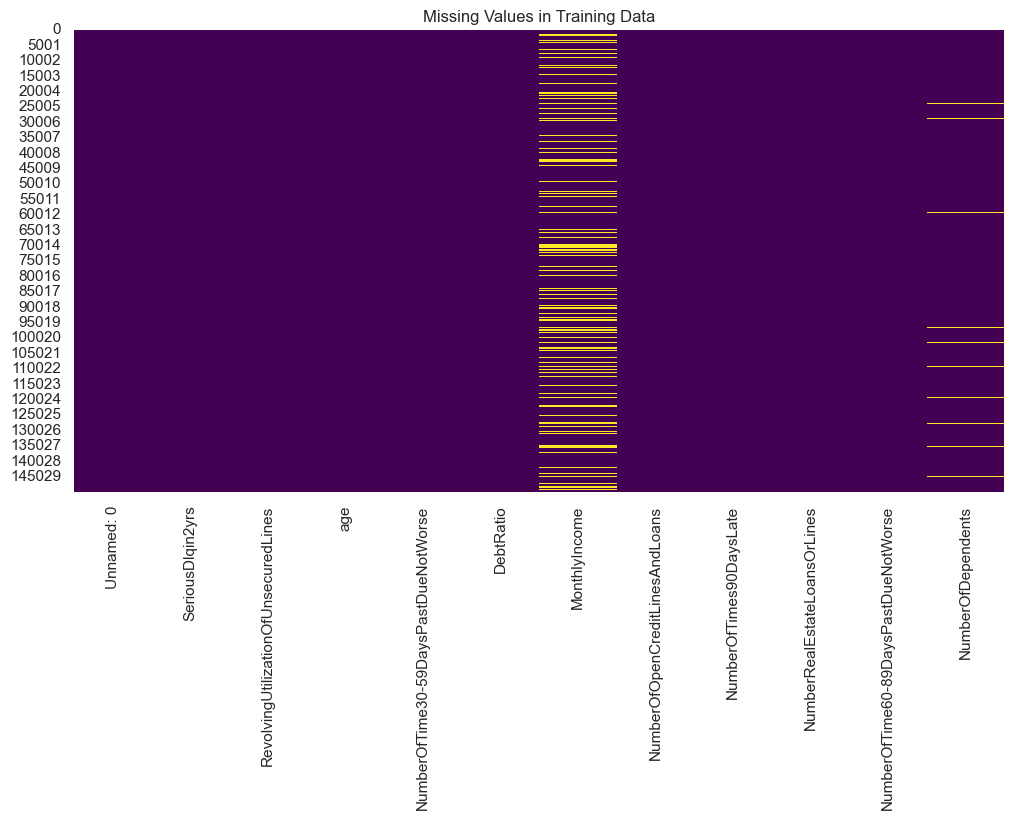

In [14]:
# Visualize missing values with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Training Data")
plt.show()